In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(M):
    fig, ax = plt.subplots()
    im = ax.imshow(M, cmap="Blues", origin='lower')
    fig.colorbar(im)
    return fig

def plot_train(train, val):
    fig, ax = plt.subplots()
    ax.plot(train, label='Train')
    ax.plot(val, label='Val')
    ax.legend()
    ax.set_box_aspect(1/1.62)
    return fig

In [4]:
import numpy as np

def condition_number_approx(A, M, if_nn_pred=True):
    A = A.reshape(100, 100)
    M = M.reshape(100, 100)
    if if_nn_pred: 
        M_inv = np.linalg.inv(M)
    else:
        M_inv = M
    M_inv_A = np.dot(M_inv, A) 
    u, s, v = np.linalg.svd(M_inv_A) 
    kappa = s[0] / s[-1]
    return kappa




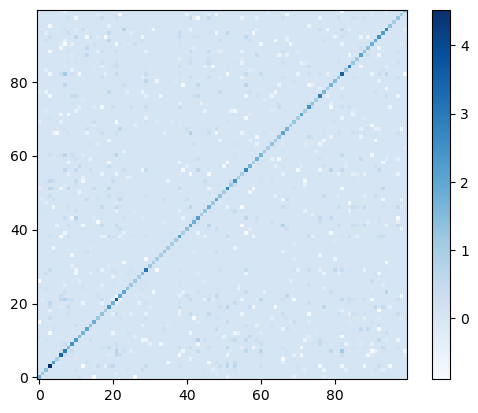

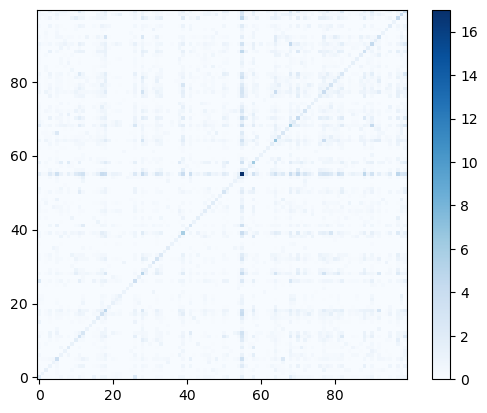

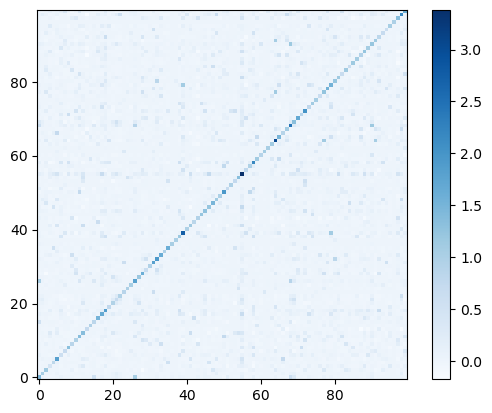

In [6]:
data = np.load('../data/data_ILU_AMG_N100.npz')
mat = data['input_mat']
M_ilu = data['M_ilu']
M_amg = data['M_amg']

fig = plot_matrix(mat[0])
fig = plot_matrix(M_ilu[0])
fig = plot_matrix(M_amg[0])

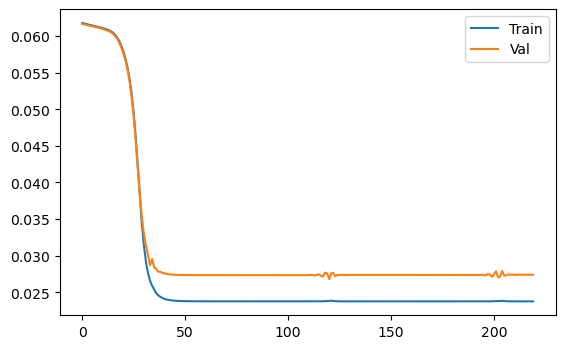

In [17]:
import pickle
with open('../../checkpoints/2023-09-04_AMG-smooth-aggre-solv/logs/logs.pkl', 'rb') as f:
    log = pickle.load(f)

log.keys()

fig = plot_train(log['train_loss'], log['val_loss'])

In [14]:
with open('../../checkpoints/2023-09-04_AMG-smooth-aggre-solv/logs/true-pred-amg.pkl', 'rb') as f:
    data = pickle.load(f)

def cond_A(A):
    A = A.reshape(100, 100)
    u, s, v = np.linalg.svd(A) 
    kappa = s[0] / s[-1]
    return kappa

ilu, amg = data['true'][0], data['true'][1]
M = data['pred']
A = data['input']

con_num_ilu = []
con_num_amg = []
con_num_M = []
con_num_A = []

for i in range(M.shape[0]):
    con_num_ilu.append(condition_number_approx(A[i], ilu[i], if_nn_pred=False))
    con_num_amg.append(condition_number_approx(A[i], amg[i], if_nn_pred=False))
    con_num_M.append(condition_number_approx(A[i], M[i], if_nn_pred=False))
    con_num_A.append(cond_A(A[i]))
    
    

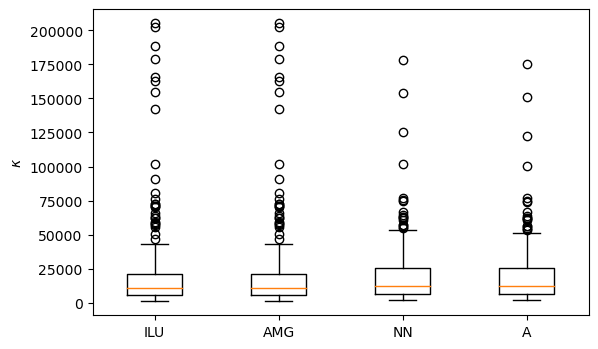

In [16]:
# make box plot for the conditin number
data = [con_num_ilu, con_num_amg, con_num_M, con_num_A]
fig ,ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['ILU', 'AMG', 'NN', "A"])
ax.set_ylabel(r'$\kappa$')
ax.set_box_aspect(1/1.62)

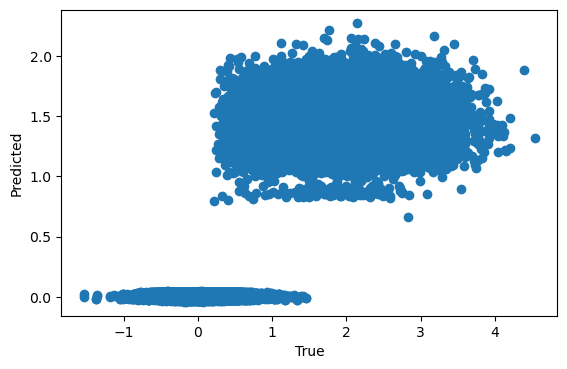

In [18]:
fig, ax = plt.subplots()

ax.scatter(amg, M)
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_box_aspect(1/1.62)


In [19]:
def r2(true, pred):
    ssr = np.sum((true - pred)**2)
    sst = np.sum((true - np.mean(true))**2)
    return 1 - ssr/sst

def mape(true, pred):
    return np.mean(np.abs(true - pred)) / np.mean(np.abs(true)) * 100

def relMSE(true, pred):
    return np.mean(np.power(true - pred, 2)) / np.mean(np.power(true, 2))

print(r2(amg, M))
print(mape(amg, M))
print(relMSE(amg, M))
print(np.abs(amg))

0.5573985576629639
89.80802297592163
0.4362831
[[1.8485818  0.02398733 0.08612242 ... 0.112203   0.46267235 2.1957684 ]
 [2.445969   0.407425   0.100103   ... 0.09926524 0.50404173 1.4073056 ]
 [2.5100045  0.01489203 0.15219317 ... 0.03387757 0.5734871  2.1210904 ]
 ...
 [1.5750537  0.0771757  0.08732026 ... 0.07044651 0.3094751  0.9141901 ]
 [2.952218   0.37455574 0.07363912 ... 0.14385605 0.14277317 1.8484524 ]
 [2.2577167  0.19398479 0.19130494 ... 0.13868658 0.4709941  0.5652883 ]]
